In [5]:
import random
random.seed(25)
import matplotlib.pyplot as plt
import pip
import numpy as np
np.random.seed(25)
import math
from scipy.stats import pareto
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.pyplot as plt
import random
from IPython.display import display, Math

In [6]:
#Code for the Discrete Model (Greedy_Algorithm)

#We set n=2 here. In the code, A-agents，B-agents are hard-to-match agents，O_agents are easy-to-match agents
lam=0.2

def simulation_greedy_algorithm_loss(m,d): #To calculate the loss for greedy algorithm under steady state, the last 5000 iterations are used to calculate the loss
    Z_A=0
    Z_B=0
    Z_O=0  #Z_A,Z_B,Z_O represent the number of A-agents, B-agents, O-agents that stay in the pool currently.
    A_hascome=0
    B_hascome=0
    O_hascome=0 # A_hascome, B_hascome, O_hascome represent the total number of A-agents, B-agents, O-agents that used to come to the pool.
    A_hasgone=0
    B_hasgone=0
    O_hasgone=0 #A_hasgone, B_hasgone, O_hasgone represent the number of A-agents, B-agents, O-agents that leave the market without matching
    
    for t in range(20000):#Here we let the state of the Markov Chain changes for 20000 times
        choice=random.random() #A random number in [0,1] used to determine if someone comes into the market before somone in the market becomes critical or not
        if choice<=1.0*m/(m+Z_A+Z_B+Z_O):#Represent that the new state is that someone comes into the market before someone in the market becomes critical
            ABO=np.random.choice(3,p=[lam,lam,1-2*lam])#The probability that a new agent is A-agent/B-agent is lam respectively, the probability that a new agent is O-agent is 1-2lam
            if ABO==0:#new agent is A-agent
                Z_A+=1
                if t>=15000:
                    A_hascome+=1 #We calculate agent_hascome and agent_hasgone only after 15000 iterations, so that the Markov Chain is near the steady state
                p_matchwithA=1-(1-d/m)**(Z_A-1)
                p_matchwithO=(1-d/m)**(Z_A-1)*(1-(1-d/m)**Z_O)
                p_stay=max(1-p_matchwithA-p_matchwithO,0)#Sometimes due to the error of float number， p_stay will be -0.0000x, therefore we use max to correct this.
                choice=np.random.choice(3,p=[p_matchwithA,p_matchwithO,p_stay])#To determine the new A-agent matches with an A-agent, an O-agent or stay without matching
                if choice==0:
                    Z_A-=2 #match with A-agent:Two matched A agents leave together
                if choice==1:
                    Z_A-=1 #match with O-agent
                    Z_O-=1
                
                
            if ABO==1:#new agent is A-agent
                Z_B+=1
                if t>=15000:
                    B_hascome+=1 #We calculate agent_hascome and agent_hasgone only after 15000 iterations, so that the Markov Chain is near the steady state

                p_matchwithB=1-(1-d/m)**(Z_B-1)
                p_matchwithO=(1-d/m)**(Z_B-1)*(1-(1-d/m)**Z_O)
                p_stay=max(1-p_matchwithB-p_matchwithO,0)#Sometimes due to the error of float number， p_stay will be -0.0000x, therefore we use max to correct this.
                choice=np.random.choice(3,p=[p_matchwithB,p_matchwithO,p_stay])#To determine the new B-agent matches with an B-agent, an O-agent or stay without matching
                if choice==0:#match with B-agent:Two matched B agents leave together
                    Z_B-=2 
                if choice==1:#math with O-agent
                    Z_B-=1
                    Z_O-=1
                
            if ABO==2:#new agent is O-agent
                Z_O+=1
                if t>=15000:
                    O_hascome+=1 #We calculate agent_hascome and agent_hasgone only after 15000 iterations, so that the Markov Chain is near the steady state
                
                p_matchwithA=(1-(1-d/m)**Z_A)*(1-d/m)**Z_B+0.5*(1-(1-d/m)**Z_A)*(1-(1-d/m)**Z_B)
                p_matchwithB=(1-(1-d/m)**Z_B)*(1-d/m)**Z_A+0.5*(1-(1-d/m)**Z_A)*(1-(1-d/m)**Z_B)
                p_matchwithO=(1-d/m)**(Z_A+Z_B)*(1-(1-d/m)**(Z_O-1))
                p_stay=max(1-p_matchwithA-p_matchwithB-p_matchwithO,0)#Correct the error brought by float number
                choice=np.random.choice(4,p=[p_matchwithA,p_matchwithB,p_matchwithO,p_stay])#To determine the new O-agent matches with an A-agent/B-agent/O-agent/stay without matching 
                if choice==0:
                    Z_A-=1
                    Z_O-=1
                if choice==1:
                    Z_B-=1
                    Z_O-=1
                if choice==2:#match with O-agent: Two matched O-agents leave together
                    Z_O-=2
        else:#the new state is that someone becomes critical before some new agent comes into the market
            choice=np.random.choice(3,p=[Z_A/(Z_A+Z_B+Z_O),Z_B/(Z_A+Z_B+Z_O),Z_O/(Z_A+Z_B+Z_O)])
            if choice==0:
                Z_A-=1
                if t>=15000:#We only calculate agent_hascome, agent_hasgone after 15000 iterations, so that the Markov Chain is near the steady state
                    A_hasgone+=1
                #A_hasgone+=1
            if choice==1:
                Z_B-=1
                if t>=15000:
                    B_hasgone+=1
                #B_hasgone+=1
            if choice==2:
                Z_O-=1
                if t>=15000:
                    O_hasgone+=1
                #O_hasgone+=1
        
   
    
    return 1.0*A_hasgone/A_hascome,1.0*B_hasgone/B_hascome, 1.0*O_hasgone/O_hascome #Return the loss for A-agent, B-agent, O-agent
        
        

In [7]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [8]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
X_d=[i for i in range(1,21)]
A_loss_greedy_discrete_d=np.zeros(20)
B_loss_greedy_discrete_d=np.zeros(20)
O_loss_greedy_discrete_d=np.zeros(20)
for d in tqdm(range(1,21)):#experimtents with different d for greedy algorithm
    for k in range(10):#Sample 10 trajectories and take their mean as result
        A_temp,B_temp,O_temp=simulation_greedy_algorithm_loss(8000,d)
        A_loss_greedy_discrete_d[d-1]+=A_temp
        B_loss_greedy_discrete_d[d-1]+=B_temp
        O_loss_greedy_discrete_d[d-1]+=O_temp
    A_loss_greedy_discrete_d[d-1]*=0.1
    B_loss_greedy_discrete_d[d-1]*=0.1
    O_loss_greedy_discrete_d[d-1]*=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:13<00:00,  6.70s/it]


In [9]:
#Code for the Discrete Model (Patient Algorithm)
import pip
import numpy as np
import math
from scipy.stats import pareto
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.pyplot as plt
import random
#We set n=2 here. In the code, A-agents, B-agents are hard-to-match agents. O-agents are easy-to-match agents
lam=0.2
def simulation_patient_algorithm_loss(m,d):
    Z_A=0
    Z_B=0
    Z_O=0     #Z_A,Z_B,Z_O represent the number of A-agents, B-agents, O-agents that stay in the pool currently
    A_hascome=0
    B_hascome=0
    O_hascome=0 #A_hascome, B_hascome, O_hascome represent the total number of A-agents, B-agents, O-agents that used to come to the pool
    A_hasgone=0
    B_hasgone=0
    O_hasgone=0 #A_hasgone, B_hasgone, O_hasgone represent the number of A-agents, B-agents, O-agents that leave the market without matching
    
    for t in range(20000):#Here we let the state of the Markov Chain changes for 20000 times, the last 5000 transitions are used to calculate the loss
        choice=random.random()#A random number in [0,1] used to determine if someone comes into the market before somone in the market becomes critical or not
        if choice<=1.0*m/(m+Z_A+Z_B+Z_O):#Represent that the new state is that someone comes into the market before someone in the market becomes critical
            ABO=np.random.choice(3,p=[lam,lam,1-2*lam])#To determine if a new coming agent is A-agent, B-agent or O-agent
            if ABO==0:
                Z_A+=1
                if t>=15000:# We only calculate agent_hascome and agent_hasgone after 15000 iterations so that the Markov Chain is near the steady state
                    A_hascome+=1 
                #A_hascome+=1
                
               
            if ABO==1:
                Z_B+=1
                if t>=15000:# We only calculate agent_hascome and agent_hasgone after 15000 iterations so that the Markov Chain is near the steady state
                    B_hascome+=1
                #B_hascome+=1
              
                
            if ABO==2:
                Z_O+=1
                if t>=15000:# We only calculate agent_hascome and agent_hasgone after 15000 iterations so that the Markov Chain is near the steady state
                    O_hascome+=1
                #O_hascome+=1
                
        else:#the new state is that someone becomes critical before some new agent comes into the market
            choice=np.random.choice(3,p=[Z_A/(Z_A+Z_B+Z_O),Z_B/(Z_A+Z_B+Z_O),Z_O/(Z_A+Z_B+Z_O)])#determine which kind of agent becomes critical
            if choice==0:#A agent becomes critical
                p_matchwithA=1-(1-d/m)**(max(Z_A-1,0))
                p_matchwithO=(1-d/m)**(max(Z_A-1,0))*(1-(1-d/m)**Z_O)
                p_stay=max(1-p_matchwithA-p_matchwithO,0)
                choose=np.random.choice(3,p=[p_matchwithA,p_matchwithO,p_stay])#To determine to match with A-agent, O-agent or leave without matching 
                if choose==0:
                    Z_A-=2
                if choose==1:
                    Z_A-=1
                    Z_O-=1
                if choose==2:
                    Z_A-=1
                    if t>=15000:# We only calculate agent_hascome and agent_hasgone after 15000 iterations so that the Markov Chain is near the steady state
                        A_hasgone+=1
                    
            if choice==1:#B-agent becomes critical
                p_matchwithB=1-(1-d/m)**(max(Z_B-1,0))
                p_matchwithO=(1-d/m)**(max(Z_B-1,0))*(1-(1-d/m)**Z_O)
                p_stay=max(1-p_matchwithB-p_matchwithO,0)
                choose=np.random.choice(3,p=[p_matchwithB,p_matchwithO,p_stay])#To determine to match with B-agent, O-agent or leave without matching
                if choose==0:
                    Z_B-=2
                if choose==1:
                    Z_B-=1
                    Z_O-=1
                if choose==2:
                    Z_B-=1
                    if t>=15000:# We only calculate agent_hascome and agent_hasgone after 15000 iterations so that the Markov Chain is near the steady state
                        B_hasgone+=1
                    #B_hasgone+=1
            if choice==2:#O-agent becomes critical
                p_matchwithA=(1-(1-d/m)**Z_A)*(1-d/m)**Z_B+0.5*(1-(1-d/m)**Z_A)*(1-(1-d/m)**Z_B)
                p_matchwithB=(1-(1-d/m)**Z_B)*(1-d/m)**Z_A+0.5*(1-(1-d/m)**Z_A)*(1-(1-d/m)**Z_B)
                p_matchwithO=(1-d/m)**(Z_A+Z_B)*(1-(1-d/m)**(max(Z_O-1,0)))
                p_stay=max(1-p_matchwithA-p_matchwithB-p_matchwithO,0)
                
                choose=np.random.choice(4,p=[p_matchwithA,p_matchwithB,p_matchwithO,p_stay])#To determine to match with A-agent, B-agent, O-agent or leave without matching
                if choose==0:
                    Z_A-=1
                    Z_O-=1
                if choose==1:
                    Z_B-=1
                    Z_O-=1
                if choose==2:
                    Z_O-=2
                if choose==3:
                    Z_O-=1
                    if t>=15000:# We only calculate agent_hascome and agent_hasgone after 15000 iterations so that the Markov Chain is near the steady state
                        O_hasgone+=1
                    #O_hasgone+=1
       
  

    return 1.0*A_hasgone/A_hascome,1.0*B_hasgone/B_hascome,1.0*O_hasgone/O_hascome

In [10]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
A_loss_patient_discrete_d=np.zeros(20)
B_loss_patient_discrete_d=np.zeros(20)
O_loss_patient_discrete_d=np.zeros(20)
for d in tqdm(range(1,21)):#experiments with different d for patient algorithm
    for k in range(10):
        A_temp,B_temp,O_temp=simulation_patient_algorithm_loss(8000,d)#Sample 10 trajectories and take their mean as the result
        A_loss_patient_discrete_d[d-1]+=A_temp
        B_loss_patient_discrete_d[d-1]+=B_temp
        O_loss_patient_discrete_d[d-1]+=O_temp
    A_loss_patient_discrete_d[d-1]*=0.1
    B_loss_patient_discrete_d[d-1]*=0.1
    O_loss_patient_discrete_d[d-1]*=0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:26<00:00,  4.31s/it]


In [11]:
from tqdm import tqdm
A_loss_greedy_discrete_lam=np.zeros(24)
B_loss_greedy_discrete_lam=np.zeros(24)
O_loss_greedy_discrete_lam=np.zeros(24)
numbda=[0.02*i for i in range(1,25)]
for k in tqdm(range(1,25)):#experiments with different lam for greedy algorithm
    lam=numbda[k-1]
    for t in range(10):
        A_tem,B_tem,O_tem=simulation_greedy_algorithm_loss(8000,10)#Sample 10 trajectories and take their mean as the result
        A_loss_greedy_discrete_lam[k-1]+=A_tem
        B_loss_greedy_discrete_lam[k-1]+=B_tem
        O_loss_greedy_discrete_lam[k-1]+=O_tem
    A_loss_greedy_discrete_lam[k-1]*=0.1
    B_loss_greedy_discrete_lam[k-1]*=0.1
    O_loss_greedy_discrete_lam[k-1]*=0.1
    

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [02:38<00:00,  6.62s/it]


In [12]:
from tqdm import tqdm
A_loss_patient_discrete_lam=np.zeros(24)
B_loss_patient_discrete_lam=np.zeros(24)
O_loss_patient_discrete_lam=np.zeros(24)
numbda=[0.02*i for i in range(1,25)]
for k in tqdm(range(1,25)):
    lam=numbda[k-1]
    for t in range(10):
        A_tem,B_tem,O_tem=simulation_patient_algorithm_loss(8000,10)
        A_loss_patient_discrete_lam[k-1]+=A_tem
        B_loss_patient_discrete_lam[k-1]+=B_tem
        O_loss_patient_discrete_lam[k-1]+=O_tem
    A_loss_patient_discrete_lam[k-1]*=0.1
    B_loss_patient_discrete_lam[k-1]*=0.1
    O_loss_patient_discrete_lam[k-1]*=0.1

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [01:42<00:00,  4.29s/it]


In [13]:
#ODE for greedy algorithm
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy
m=8000
d=10
lam=0.2
def f(abo,t):# f function is used to calculate the derivatives for the greedy algorithm, input: current number of A-agents, B-agents, O-agents, output: d Z_A/dt, d Z_B/dt, d Z_O/dt
    A,B,O=abo
    return [-(lam*m)*(1-(1-d/m)**A)+(lam*m)*((1-d/m)**A)*((1-d/m)**O)-(m-2*lam*m)*(1-(1-d/m)**A)*(1-d/m)**B-((m-2*lam*m)/2)*(1-(1-d/m)**A)*(1-(1-d/m)**B)-A,\
           -(lam*m)*(1-(1-d/m)**B)+(lam*m)*((1-d/m)**B)*((1-d/m)**O)-(m-2*lam*m)*(1-(1-d/m)**B)*(1-d/m)**A-((m-2*lam*m)/2)*(1-(1-d/m)**B)*(1-(1-d/m)**A)-B,\
           -(lam*m)*((1-d/m)**A)*(1-(1-d/m)**O)-(lam*m)*((1-d/m)**B)*(1-(1-d/m)**O)-(m-2*lam*m)*((1-d/m)**A)*((1-d/m)**B)*(1-(1-d/m)**O)+(m-2*lam*m)*(1-d/m)**(A+B+O)-O]

In [14]:
A_stationary_loss_greedy_d=np.zeros(20)
B_stationary_loss_greedy_d=np.zeros(20)
O_stationary_loss_greedy_d=np.zeros(20)#A_stationary, B_stationary, O_stationary are used to store the loss
for i in range(1,21):#experiments with different d for greedy algorithm using ODE models
    d=i
    abo=[0.0,0.0,0.0]
    t=np.linspace(0,20,200000)
    abo_t=integrate.odeint(f,abo,t)
    A_stationary_loss_greedy_d[i-1]=np.mean(abo_t[100000:200000,0])
    B_stationary_loss_greedy_d[i-1]=np.mean(abo_t[100000:200000,1])
    O_stationary_loss_greedy_d[i-1]=np.mean(abo_t[100000:200000,2])
A_stationary_loss_greedy_d=A_stationary_loss_greedy_d/(lam*m)
B_stationary_loss_greedy_d=B_stationary_loss_greedy_d/(lam*m)
O_stationary_loss_greedy_d=O_stationary_loss_greedy_d/((1-2*lam)*m)#As our paper illustrates, when using greedy algorithm, the loss for a type of agents when T tends to infty is equal to the number of this type of agents at steady state divided by the arrival rate of this type of agents 

In [15]:
X_ODE_greedy_d=[i for i in range(1,21)]

In [16]:
A_stationary_loss_greedy_lam=np.zeros(24)
B_stationary_loss_greedy_lam=np.zeros(24)
O_stationary_loss_greedy_lam=np.zeros(24)
numbda=[0.02*i for i in range(1,25)]#experiments with different lambda for greedy algorithm using ODE models
for i in range(1,25):
    d=10
    lam=numbda[i-1]
    abo=[0.0,0.0,0.0]
    t=np.linspace(0,20,20000000)
    abo_t=integrate.odeint(f,abo,t)
    A_stationary_loss_greedy_lam[i-1]=np.mean(abo_t[10000000:20000000,0])
    B_stationary_loss_greedy_lam[i-1]=np.mean(abo_t[10000000:20000000,1])
    O_stationary_loss_greedy_lam[i-1]=np.mean(abo_t[10000000:20000000,2])
    A_stationary_loss_greedy_lam[i-1]=A_stationary_loss_greedy_lam[i-1]/(lam*m)
    B_stationary_loss_greedy_lam[i-1]=B_stationary_loss_greedy_lam[i-1]/(lam*m)
    O_stationary_loss_greedy_lam[i-1]=O_stationary_loss_greedy_lam[i-1]/((1-2*lam)*m)#As our paper illustrates, when using greedy algorithm, the loss for a type of agents when T tends to infty is equal to the number of this type of agents at steady state divided by the arrival rate of this type of agents 

In [17]:
#ODE for patient algorithm
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy
from tqdm import tqdm
m=8000
d=10
lam=0.2
def f2(abo,t):# f2 function is used to calculate the derivatives for the patient algorithm, input: current number of A-agents, B-agents, O-agents, output: d Z_A/dt, d Z_B/dt, d Z_O/dt
    A,B,O=abo
    return [lam*m-A*(1-d/m)**(A+O)-2*A*(1-(1-d/m)**A)-A*(1-d/m)**A*(1-(1-d/m)**O)-O*(1-(1-d/m)**A)*(1-d/m)**B-0.5*O*(1-(1-d/m)**A)*(1-(1-d/m)**B),\
            lam*m-B*(1-d/m)**(B+O)-2*B*(1-(1-d/m)**B)-B*(1-d/m)**B*(1-(1-d/m)**O)-O*(1-(1-d/m)**B)*(1-d/m)**A-0.5*O*(1-(1-d/m)**B)*(1-(1-d/m)**A),\
            (1-2*lam)*m-A*(1-d/m)**A*(1-(1-d/m)**O)-B*(1-d/m)**B*(1-(1-d/m)**O)-2*O*(1-d/m)**(A+B)*(1-(1-d/m)**O)-O*(1-(1-d/m)**(A+B)*(1-(1-d/m)**O))]
          

In [18]:
A_stationary_loss_patient_d=np.zeros(20)
B_stationary_loss_patient_d=np.zeros(20)
O_stationary_loss_patient_d=np.zeros(20)
for i in tqdm(range(1,21)):#experitments with different d for patient algorithm using ODE models
    d=i
    abo=[0.0,0.0,0.0]
    t=np.linspace(0,20,2000000)
    abo_t=integrate.odeint(f2,abo,t)
    A_tem=np.mean(abo_t[1000000:2000000,0])
    B_tem=np.mean(abo_t[1000000:2000000,1])
    O_tem=np.mean(abo_t[1000000:2000000,2])
    A_stationary_loss_patient_d[i-1]=(1-d/m)**(A_tem+O_tem)*A_tem/(lam*m)
    B_stationary_loss_patient_d[i-1]=(1-d/m)**(B_tem+O_tem)*B_tem/(lam*m)
    O_stationary_loss_patient_d[i-1]=(1-d/m)**(O_tem+A_tem+B_tem)*O_tem/((1-2*lam)*m)
    


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  7.85it/s]


In [19]:
X_ODE_patient_d=[i for i in range(1,21)]

In [20]:
A_stationary_loss_patient_lam=np.zeros(24)
B_stationary_loss_patient_lam=np.zeros(24)
O_stationary_loss_patient_lam=np.zeros(24)
for i in tqdm(range(1,25)):
    d=10
    m=8000
    lam=numbda[i-1]
    abo=[0.0,0.0,0.0]
    t=np.linspace(0,20,2000000)
    abo_t=integrate.odeint(f2,abo,t)
    A_tem=np.mean(abo_t[1000000:2000000,0])
    B_tem=np.mean(abo_t[1000000:2000000,1])
    O_tem=np.mean(abo_t[1000000:2000000,2])
    A_stationary_loss_patient_lam[i-1]=((1-d/m)**(A_tem+O_tem))*A_tem/(lam*m)
    B_stationary_loss_patient_lam[i-1]=((1-d/m)**(B_tem+O_tem))*B_tem/(lam*m)
    O_stationary_loss_patient_lam[i-1]=((1-d/m)**(O_tem+A_tem+B_tem))*O_tem/((1-2*lam)*m)

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.80it/s]


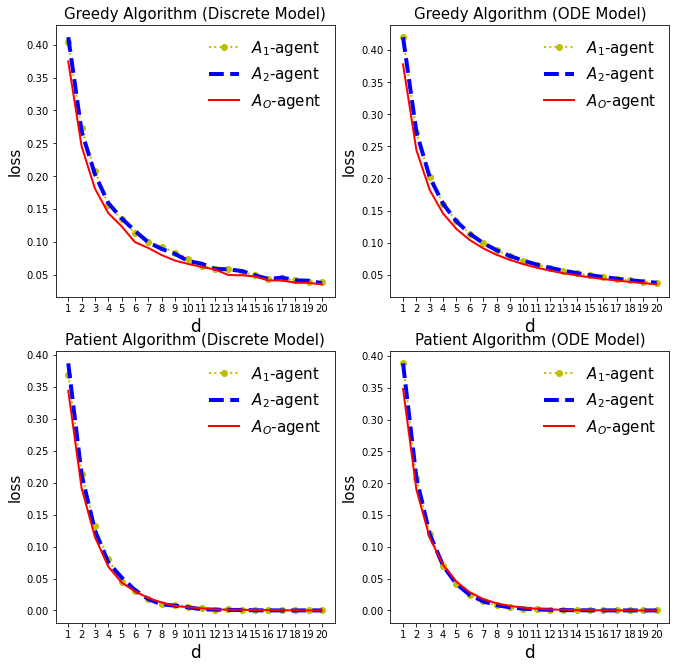

In [21]:
#Now we illustrate the result
fig,ax=plt.subplots(2,2,figsize=(11,11))
ax[0][0].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[0][0].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax[0][0].set_xlabel("d",fontsize=17)
ax[0][0].set_ylabel("loss",fontsize=15)
ax[0][0].plot(X_d,A_loss_greedy_discrete_d,'y:o',lw=2,label='$A_1$-agent')
ax[0][0].plot(X_d,B_loss_greedy_discrete_d,'b--',lw=4,label='$A_2$-agent')
ax[0][0].plot(X_d,O_loss_greedy_discrete_d,'r-',lw=2,label='$A_O$-agent')
ax[0][0].set_title("Greedy Algorithm (Discrete Model)",fontsize=15)
ax[0][0].legend(loc='best', frameon=False,fontsize=15)
ax[0][1].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[0][1].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax[0][1].set_xlabel("d",fontsize=17)
ax[0][1].set_ylabel("loss",fontsize=15)
ax[0][1].plot(X_ODE_greedy_d,A_stationary_loss_greedy_d,'y:o',lw=2,label='$A_1$-agent')
ax[0][1].plot(X_ODE_greedy_d,B_stationary_loss_greedy_d,'b--',lw=4,label='$A_2$-agent')
ax[0][1].plot(X_ODE_greedy_d,O_stationary_loss_greedy_d,'r-',lw=2,label='$A_O$-agent')
ax[0][1].set_title("Greedy Algorithm (ODE Model)",fontsize=15)
ax[0][1].legend(loc='best', frameon=False,fontsize=15)
ax[1][0].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[1][0].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax[1][0].set_xlabel("d",fontsize=17)
ax[1][0].set_ylabel("loss",fontsize=15)
ax[1][0].plot(X_d,A_loss_patient_discrete_d,'y:o',lw=2,label='$A_1$-agent')
ax[1][0].plot(X_d,B_loss_patient_discrete_d,'b--',lw=4,label='$A_2$-agent')
ax[1][0].plot(X_d,O_loss_patient_discrete_d,'r-',lw=2,label='$A_O$-agent')
ax[1][0].set_title("Patient Algorithm (Discrete Model)",fontsize=15)
ax[1][0].legend(loc='best', frameon=False,fontsize=15)
ax[1][1].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[1][1].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax[1][1].set_xlabel("d",fontsize=17)
ax[1][1].set_ylabel("loss",fontsize=15)
ax[1][1].plot(X_ODE_patient_d,A_stationary_loss_patient_d,'y:o',lw=2,label='$A_1$-agent')
ax[1][1].plot(X_ODE_patient_d,B_stationary_loss_patient_d,'b--',lw=4,label='$A_2$-agent')
ax[1][1].plot(X_ODE_patient_d,O_stationary_loss_patient_d,'r-',lw=2,label='$A_O$-agent')
ax[1][1].set_title("Patient Algorithm (ODE Model)",fontsize=15)
ax[1][1].legend(loc='best', frameon=False,fontsize=15)
plt.savefig('C:\\Users\\hhz13\\Downloads\\Figure_1_different_d.eps', format='eps', dpi=1000)

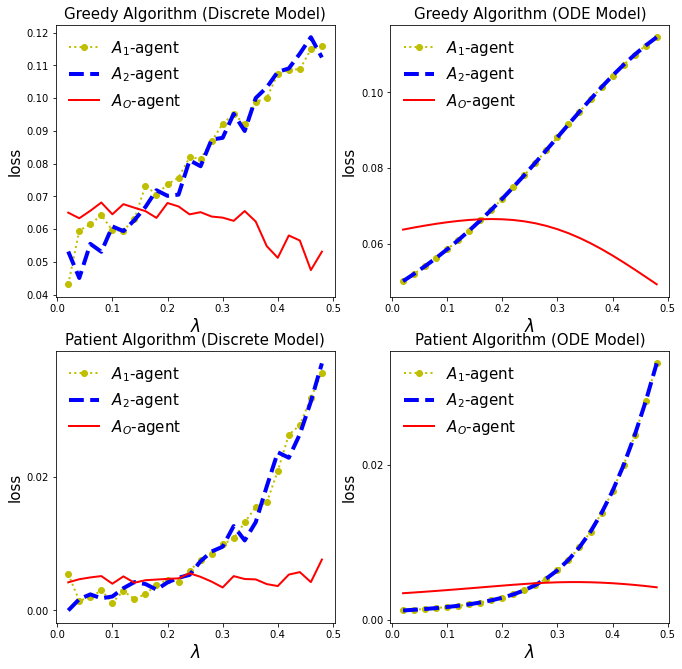

In [22]:
fig,ax=plt.subplots(2,2,figsize=(11,11))
ax[0][0].xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax[0][0].yaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax[0][0].set_xlabel("$\lambda$",fontsize=17)
ax[0][0].set_ylabel("loss",fontsize=15)
ax[0][0].plot(numbda,A_loss_greedy_discrete_lam,'y:o',lw=2,label='$A_1$-agent')
ax[0][0].plot(numbda,B_loss_greedy_discrete_lam,'b--',lw=4,label='$A_2$-agent')
ax[0][0].plot(numbda,O_loss_greedy_discrete_lam,'r-',lw=2,label='$A_O$-agent')
ax[0][0].set_title("Greedy Algorithm (Discrete Model)",fontsize=15)
ax[0][0].legend(loc='best', frameon=False,fontsize=15)
ax[0][1].xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax[0][1].yaxis.set_major_locator(ticker.MultipleLocator(0.02))
ax[0][1].set_xlabel("$\lambda$",fontsize=17)
ax[0][1].set_ylabel("loss",fontsize=15)
ax[0][1].plot(numbda,A_stationary_loss_greedy_lam,'y:o',lw=2,label='$A_1$-agent')
ax[0][1].plot(numbda,B_stationary_loss_greedy_lam,'b--',lw=4,label='$A_2$-agent')
ax[0][1].plot(numbda,O_stationary_loss_greedy_lam,'r-',lw=2,label='$A_O$-agent')
ax[0][1].set_title("Greedy Algorithm (ODE Model)",fontsize=15)
ax[0][1].legend(loc='best', frameon=False,fontsize=15)
ax[1][0].xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax[1][0].yaxis.set_major_locator(ticker.MultipleLocator(0.02))
ax[1][0].set_xlabel("$\lambda$",fontsize=17)
ax[1][0].set_ylabel("loss",fontsize=15)
ax[1][0].plot(numbda,A_loss_patient_discrete_lam,'y:o',lw=2,label='$A_1$-agent')
ax[1][0].plot(numbda,B_loss_patient_discrete_lam,'b--',lw=4,label='$A_2$-agent')
ax[1][0].plot(numbda,O_loss_patient_discrete_lam,'r-',lw=2,label='$A_O$-agent')
ax[1][0].set_title("Patient Algorithm (Discrete Model)",fontsize=15)
ax[1][0].legend(loc='best', frameon=False,fontsize=15)
ax[1][1].xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax[1][1].yaxis.set_major_locator(ticker.MultipleLocator(0.02))
ax[1][1].set_xlabel("$\lambda$",fontsize=17)
ax[1][1].set_ylabel("loss",fontsize=15)
ax[1][1].plot(numbda,A_stationary_loss_patient_lam,'y:o',lw=2,label='$A_1$-agent')
ax[1][1].plot(numbda,B_stationary_loss_patient_lam,'b--',lw=4,label='$A_2$-agent')
ax[1][1].plot(numbda,O_stationary_loss_patient_lam,'r-',lw=2,label='$A_O$-agent')
ax[1][1].set_title("Patient Algorithm (ODE Model)",fontsize=15)
ax[1][1].legend(loc='best', frameon=False,fontsize=15)
plt.savefig('C:\\Users\\hhz13\\Downloads\\Figure_3_different_lam.eps', format='eps', dpi=1000)

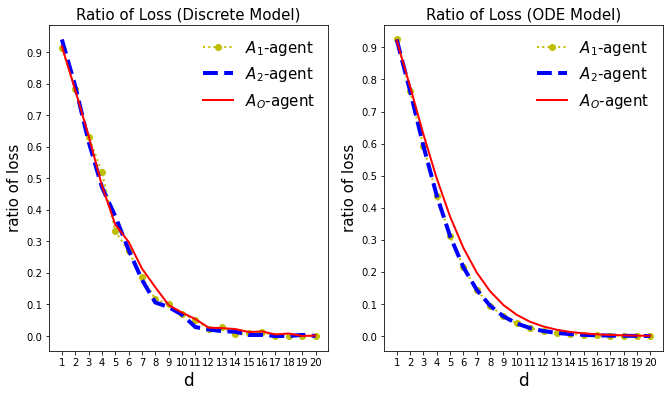

In [23]:
#Ratio of Loss: Loss using patient algorithm divided by loss using greedy algorithm
A_ratio_discrete=np.zeros(20)
B_ratio_discrete=np.zeros(20)
O_ratio_discrete=np.zeros(20)
A_ratio_ODE=np.zeros(20)
B_ratio_ODE=np.zeros(20)
O_ratio_ODE=np.zeros(20)
for d in range(20):
    A_ratio_discrete[d]=A_loss_patient_discrete_d[d]/A_loss_greedy_discrete_d[d]
    B_ratio_discrete[d]=B_loss_patient_discrete_d[d]/B_loss_greedy_discrete_d[d]
    O_ratio_discrete[d]=O_loss_patient_discrete_d[d]/O_loss_greedy_discrete_d[d]
    A_ratio_ODE[d]=A_stationary_loss_patient_d[d]/A_stationary_loss_greedy_d[d]
    B_ratio_ODE[d]=B_stationary_loss_patient_d[d]/B_stationary_loss_greedy_d[d]
    O_ratio_ODE[d]=O_stationary_loss_patient_d[d]/O_stationary_loss_greedy_d[d]
fig,ax=plt.subplots(1,2,figsize=(11,6))   
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax[0].set_xlabel("d",fontsize=17)
ax[0].set_ylabel("ratio of loss",fontsize=15)
ax[0].plot(X_d,A_ratio_discrete,'y:o',lw=2,label='$A_1$-agent')
ax[0].plot(X_d,B_ratio_discrete,'b--',lw=4,label='$A_2$-agent')
ax[0].plot(X_d,O_ratio_discrete,'r-',lw=2,label='$A_O$-agent')
ax[0].set_title("Ratio of Loss (Discrete Model)",fontsize=15)
ax[0].legend(loc='best', frameon=False,fontsize=15)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax[1].set_xlabel("d",fontsize=17)
ax[1].set_ylabel("ratio of loss",fontsize=15)
ax[1].plot(X_d,A_ratio_ODE,'y:o',lw=2,label='$A_1$-agent')
ax[1].plot(X_d,B_ratio_ODE,'b--',lw=4,label='$A_2$-agent')
ax[1].plot(X_d,O_ratio_ODE,'r-',lw=2,label='$A_O$-agent')
ax[1].set_title("Ratio of Loss (ODE Model)",fontsize=15)
ax[1].legend(loc='best', frameon=False,fontsize=15)
plt.savefig('C:\\Users\\hhz13\\Downloads\\Figure_2_Ratio.eps', format='eps', dpi=1000)

In [24]:
#Next we illustrate the loss for O-agents divided by e^{-0.5d} with different lambda when using patient algorithm

In [25]:
A_stationary_loss_one=np.zeros(500)
B_stationary_loss_one=np.zeros(500)
O_stationary_loss_one=np.zeros(500)#To save the loss when lam=0.1
lam=0.05
m=300000000
for i in tqdm(range(1,501)):
    d=i
    abo=[0.0,0.0,0.0]
    t=np.linspace(0,20,2000000)
    abo_t=integrate.odeint(f2,abo,t)
    A_tem=np.mean(abo_t[1000000:2000000,0])
    B_tem=np.mean(abo_t[1000000:2000000,1])
    O_tem=np.mean(abo_t[1000000:2000000,2])
    A_stationary_loss_one[i-1]=np.exp(0.5*d)*(1-d/m)**(A_tem+O_tem)*A_tem/(lam*m)
    B_stationary_loss_one[i-1]=np.exp(0.5*d)*(1-d/m)**(B_tem+O_tem)*B_tem/(lam*m)
    O_stationary_loss_one[i-1]=np.exp(0.5*d)*(1-d/m)**(O_tem+A_tem+B_tem)*O_tem/((1-2*lam)*m)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:52<00:00,  9.60it/s]


In [26]:
A_stationary_loss_two=np.zeros(500)
B_stationary_loss_two=np.zeros(500)
O_stationary_loss_two=np.zeros(500)#To save the loss when lam=0.2
lam=0.15
for i in tqdm(range(1,501)):
    d=i
    abo=[0.0,0.0,0.0]
    t=np.linspace(0,20,2000000)
    abo_t=integrate.odeint(f2,abo,t)
    A_tem=np.mean(abo_t[1000000:2000000,0])
    B_tem=np.mean(abo_t[1000000:2000000,1])
    O_tem=np.mean(abo_t[1000000:2000000,2])
    A_stationary_loss_two[i-1]=np.exp(0.5*d)*(1-d/m)**(A_tem+O_tem)*A_tem/(lam*m)
    B_stationary_loss_two[i-1]=np.exp(0.5*d)*(1-d/m)**(B_tem+O_tem)*B_tem/(lam*m)
    O_stationary_loss_two[i-1]=np.exp(0.5*d)*(1-d/m)**(O_tem+A_tem+B_tem)*O_tem/((1-2*lam)*m)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:47<00:00, 10.46it/s]


In [27]:
A_stationary_loss_three=np.zeros(500)
B_stationary_loss_three=np.zeros(500)
O_stationary_loss_three=np.zeros(500)#To save the loss when lam=0.3
lam=0.25
for i in tqdm(range(1,501)):
    d=i
    abo=[0.0,0.0,0.0]
    t=np.linspace(0,20,2000000)
    abo_t=integrate.odeint(f2,abo,t)
    A_tem=np.mean(abo_t[1000000:2000000,0])
    B_tem=np.mean(abo_t[1000000:2000000,1])
    O_tem=np.mean(abo_t[1000000:2000000,2])
    A_stationary_loss_three[i-1]=np.exp(0.5*d)*(1-d/m)**(A_tem+O_tem)*A_tem/(lam*m)
    B_stationary_loss_three[i-1]=np.exp(0.5*d)*(1-d/m)**(B_tem+O_tem)*B_tem/(lam*m)
    O_stationary_loss_three[i-1]=np.exp(0.5*d)*(1-d/m)**(O_tem+A_tem+B_tem)*O_tem/((1-2*lam)*m)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:44<00:00, 11.36it/s]


In [28]:
A_stationary_loss_four=np.zeros(500)
B_stationary_loss_four=np.zeros(500)
O_stationary_loss_four=np.zeros(500)#To save the loss when lam=0.4
lam=0.35
for i in tqdm(range(1,501)):
    d=i
    abo=[0.0,0.0,0.0]
    t=np.linspace(0,20,2000000)
    abo_t=integrate.odeint(f2,abo,t)
    A_tem=np.mean(abo_t[1000000:2000000,0])
    B_tem=np.mean(abo_t[1000000:2000000,1])
    O_tem=np.mean(abo_t[1000000:2000000,2])
    A_stationary_loss_four[i-1]=np.exp(0.5*d)*(1-d/m)**(A_tem+O_tem)*A_tem/(lam*m)
    B_stationary_loss_four[i-1]=np.exp(0.5*d)*(1-d/m)**(B_tem+O_tem)*B_tem/(lam*m)
    O_stationary_loss_four[i-1]=np.exp(0.5*d)*(1-d/m)**(O_tem+A_tem+B_tem)*O_tem/((1-2*lam)*m)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:46<00:00, 10.67it/s]


In [29]:
A_stationary_loss_five=np.zeros(500)
B_stationary_loss_five=np.zeros(500)
O_stationary_loss_five=np.zeros(500)#To save the loss when lam=0.4
lam=0.45
for i in tqdm(range(1,501)):
    d=i
    abo=[0.0,0.0,0.0]
    t=np.linspace(0,20,2000000)
    abo_t=integrate.odeint(f2,abo,t)
    A_tem=np.mean(abo_t[1000000:2000000,0])
    B_tem=np.mean(abo_t[1000000:2000000,1])
    O_tem=np.mean(abo_t[1000000:2000000,2])
    A_stationary_loss_five[i-1]=np.exp(0.5*d)*(1-d/m)**(A_tem+O_tem)*A_tem/(lam*m)
    B_stationary_loss_five[i-1]=np.exp(0.5*d)*(1-d/m)**(B_tem+O_tem)*B_tem/(lam*m)
    O_stationary_loss_five[i-1]=np.exp(0.5*d)*(1-d/m)**(O_tem+A_tem+B_tem)*O_tem/((1-2*lam)*m)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:50<00:00,  9.97it/s]


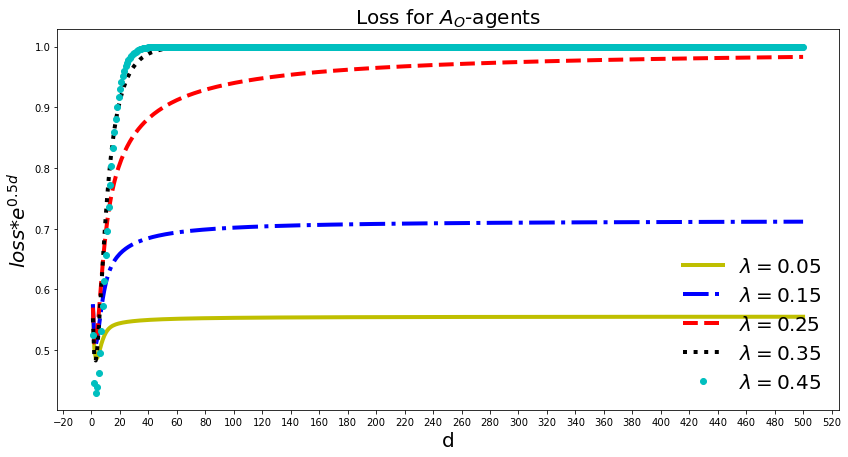

In [30]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
fig,ax=plt.subplots(1,1,figsize=(14,7))
X=[i for i in range(1,501)]
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.set_xlabel("d",fontsize=20)
ax.set_ylabel("$loss$*$e^{0.5d}$",fontsize=20)
ax.plot(X,O_stationary_loss_one.tolist(),'y-',lw=4,label='$\lambda=0.05$')
ax.plot(X,O_stationary_loss_two.tolist(),'b-.',lw=4,label='$\lambda=0.15$')
ax.plot(X,O_stationary_loss_three.tolist(),'r--',lw=4,label='$\lambda=0.25$')
ax.plot(X,O_stationary_loss_four.tolist(),'k:',lw=4,label='$\lambda=0.35$')
ax.plot(X,O_stationary_loss_five.tolist(),'co',lw=4,label='$\lambda=0.45$')
ax.set_title("Loss for $A_O$-agents",fontsize=20)
ax.legend(loc='best', frameon=False,fontsize=20)
plt.savefig('C:\\Users\\hhz13\\Downloads\\Figure_4_O-agent.eps', format='eps', dpi=1000)